In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Descriptive Statistics

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [13]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [14]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [15]:
df['Sex'] = df['Sex'].map({'M': 0, 'I': 1, 'F':2})

***ADDING AGE COLUMN***

In [16]:
df['Age'] = df['Rings'] + 2.5


In [17]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,17.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,9.5
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,11.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,12.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,9.5


In [18]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

**Visulisation**

**Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

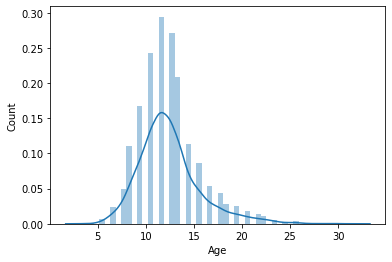

In [23]:
sns.distplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')

<function matplotlib.pyplot.show(*args, **kw)>

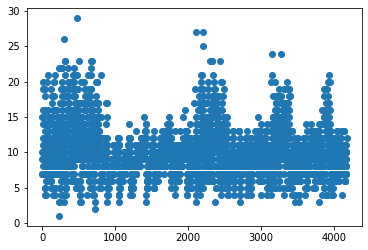

In [25]:
plt.scatter(df.index,df['Rings'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

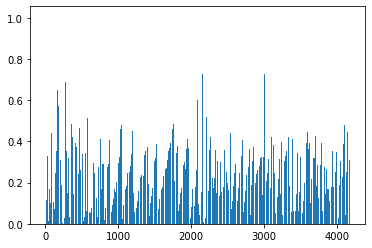

In [26]:
plt.bar(df.index,df['Shell weight'])
plt.show



***Bi-variate analysis***

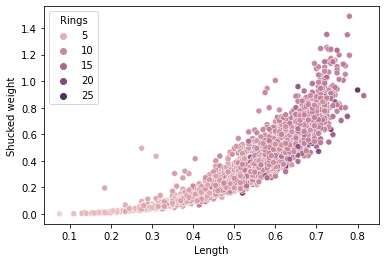

In [27]:
sns.scatterplot(data=df, x='Length', y='Shucked weight', hue='Rings',)

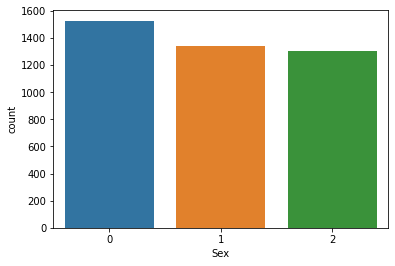

In [30]:
sns.countplot(x='Sex',data=df)

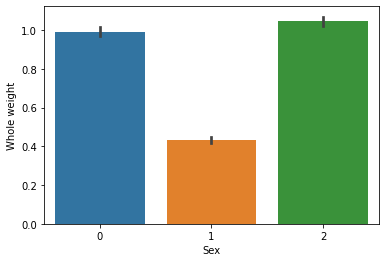

In [31]:
sns.barplot(x='Sex',y='Whole weight',data=df)

***Multiivariate analysis***

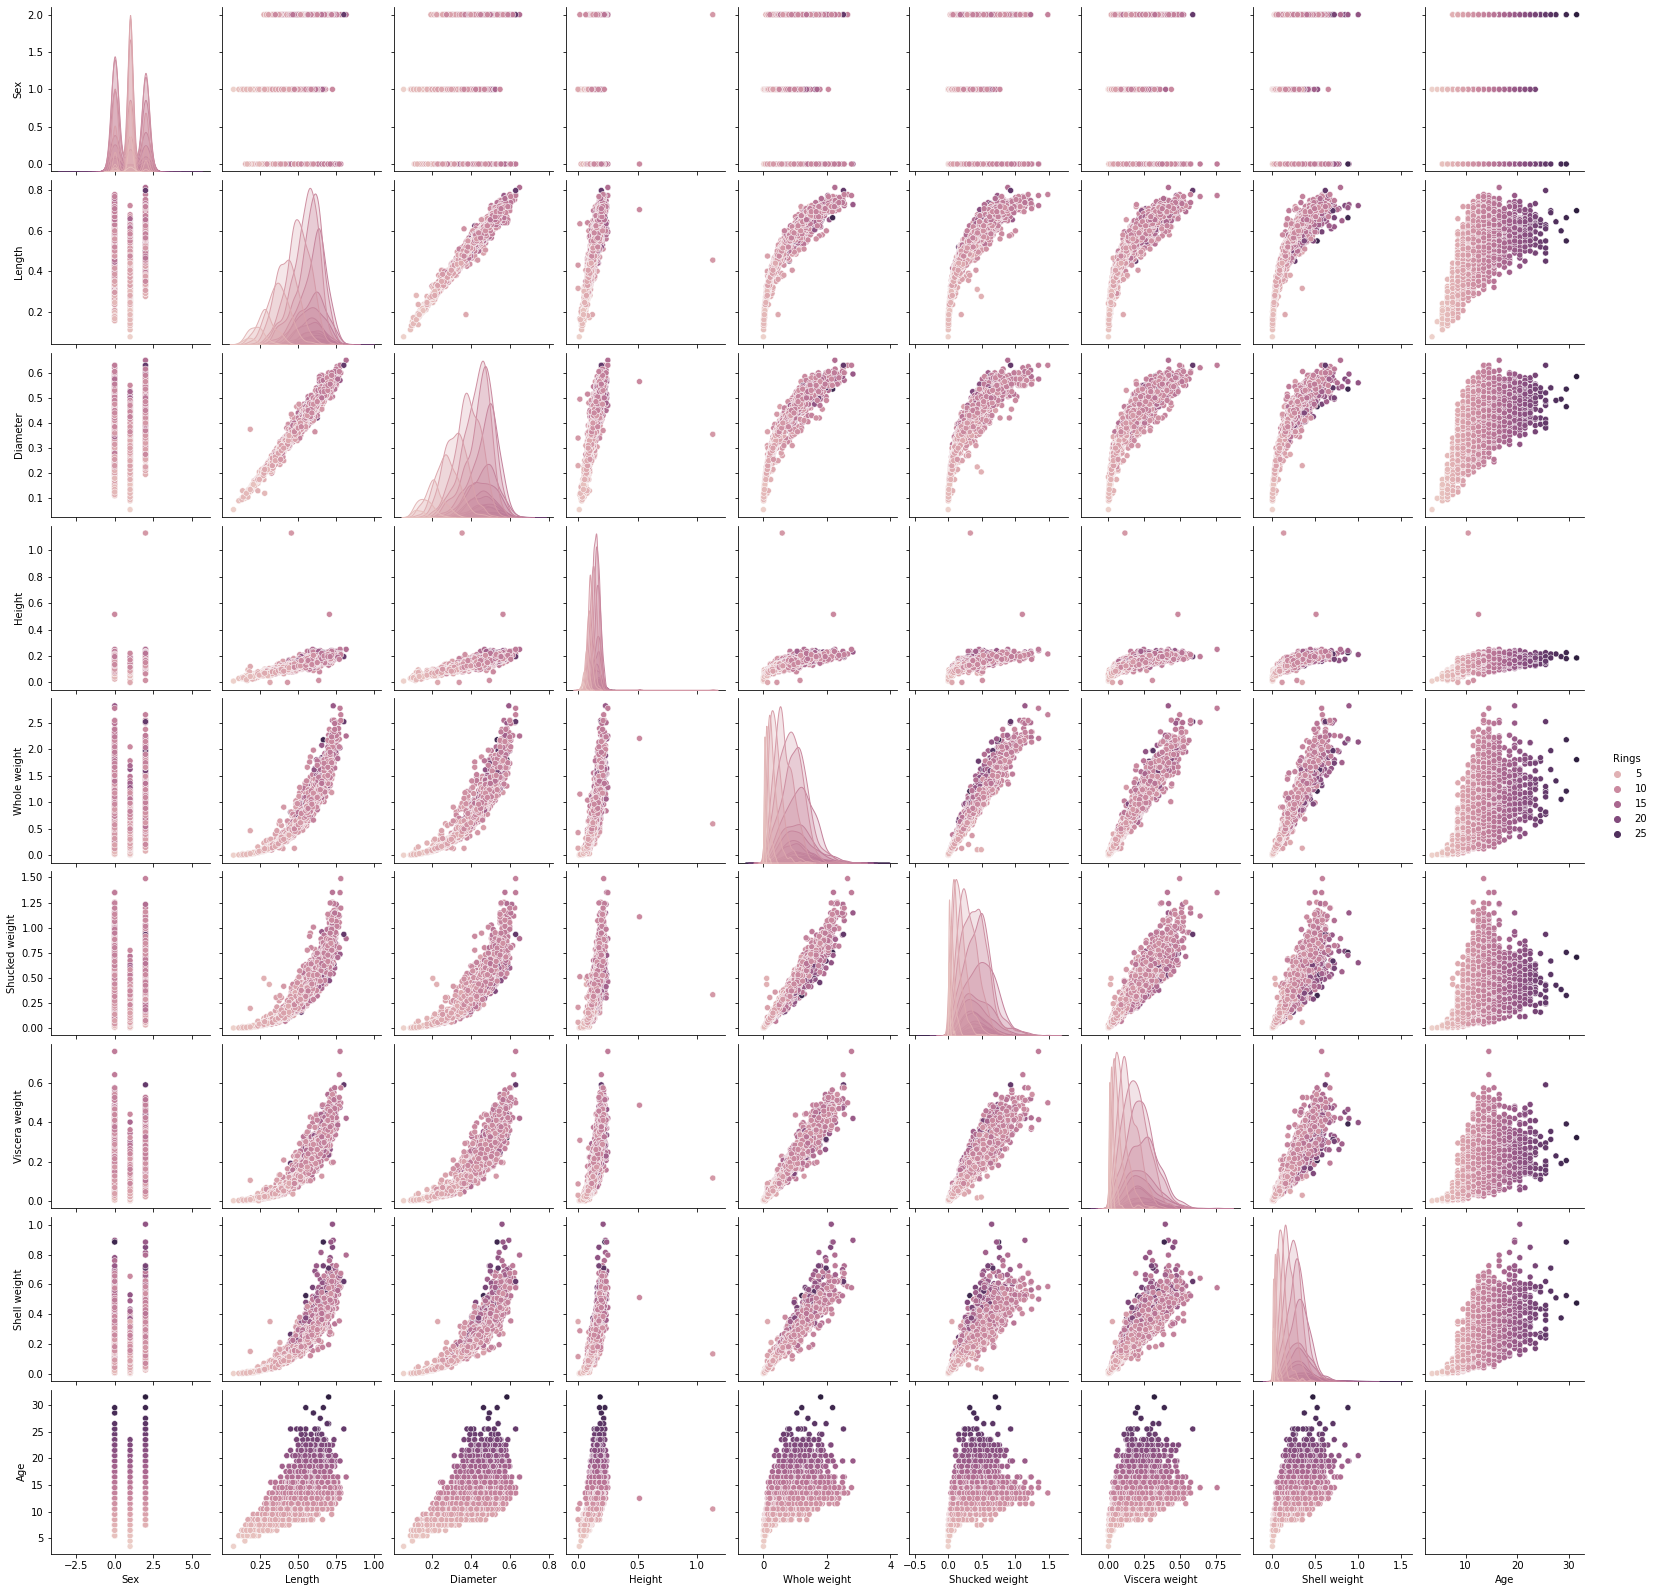

In [ ]:
sns.pairplot(data=df, hue='Rings')

In [32]:
df.corr()['Age']

Sex               0.034627
Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Age               1.000000
Name: Age, dtype: float64

In [33]:
df.shape

(4177, 10)

***Checking outliers for the data***

In [35]:
df.drop('Age',axis=1,inplace=True)

In [36]:

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


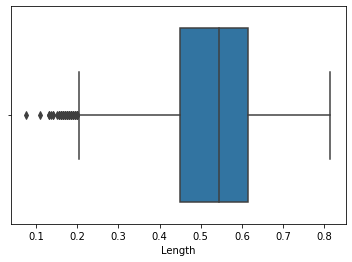

In [37]:
sns.boxplot(x=df['Length'])

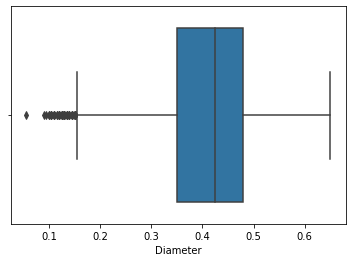

In [40]:
sns.boxplot(x=df['Diameter'])

***Outlier treatment***

In [42]:
df['Age'] = df['Rings'] + 2.5

In [43]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,17.5
1,0,0.355,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,9.5
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,11.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,12.5
4,1,0.355,0.265,0.080,0.2050,0.0895,0.0395,0.055,7,9.5


In [44]:
X = df.drop('Age', axis=1)
y = df['Age']

Split the data into training and testing

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
X_train.shape

(2923, 9)

In [47]:
X_test.shape

(1254, 9)

In [48]:
y_train.shape

(2923,)

In [49]:
y_test.shape

(1254,)

In [50]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred1 = model1.predict(X_test)

In [52]:

y_pred1

array([12.5,  9.5, 12.5, ...,  6.5, 17.5, 12.5])

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
print(mean_absolute_error( y_test, y_pred1))
print(mean_squared_error(y_test, y_pred1))

6.887986548312374e-16
1.7150175780373074e-30


In [55]:
print(r2_score( y_test,y_pred1))

1.0


In [56]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=500)
model2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [57]:
y_pred2 = model2.predict(X_test)


In [58]:

y_pred2

array([12.5,  9.5, 12.5, ...,  6.5, 17.5, 12.5])

In [59]:
print(r2_score( y_test,y_pred2))

0.9986339621242896
